# NBA all time stats

This project is based on data stored on site: https://www.kaggle.com/drgilermo/nba-players-stats.
We can find 3 .csv files there. Seasons_stats.csv contains stats from every NBA player each season since 1949/1950. Two other files contain some basic informations about each player such as: name, birthdate, height, etc.

Important note:
There is a lot of data that is missing, because not every stat is available since the first season.
More details and explaination of each stat: https://www.basketball-reference.com/about/glossary.html


## Import stats and get some basic info 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
sns.__version__
sns.set(style="darkgrid")
%matplotlib inline 

In [2]:
stat = pd.read_csv('Seasons_Stats.csv')
pl1 = pd.read_csv('Players.csv')
pl2 = pd.read_csv('player_data.csv')

In [3]:
stat.shape

(24691, 53)

In [4]:
stat.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [5]:
stat.sample(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23293,23293,2015.0,Nerlens Noel,C,20.0,PHI,75.0,71.0,2311.0,15.0,...,0.609,185.0,426.0,611.0,128.0,133.0,142.0,146.0,208.0,744.0
2881,2881,1970.0,Walt Bellamy*,C,30.0,DET,56.0,NaN,1173.0,16.7,...,0.562,NaN,NaN,397.0,55.0,NaN,NaN,NaN,163.0,560.0
21999,21999,2013.0,Shaun Livingston,PG,27.0,CLE,49.0,12.0,1135.0,14.6,...,0.843,29.0,92.0,121.0,177.0,37.0,29.0,59.0,105.0,354.0
13782,13782,1998.0,Bryant Reeves,C,24.0,VAN,74.0,74.0,2527.0,17.3,...,0.706,196.0,389.0,585.0,155.0,39.0,80.0,156.0,278.0,1207.0
13156,13156,1997.0,Jamal Mashburn,SF,24.0,DAL,37.0,21.0,975.0,11.9,...,0.649,28.0,87.0,115.0,93.0,35.0,5.0,57.0,69.0,394.0
12811,12811,1996.0,Monty Williams,SF,24.0,NYK,14.0,0.0,62.0,7.9,...,0.625,9.0,8.0,17.0,4.0,2.0,0.0,5.0,9.0,19.0
12195,12195,1995.0,John Salley,C,30.0,MIA,75.0,50.0,1955.0,11.4,...,0.739,110.0,226.0,336.0,123.0,47.0,85.0,97.0,279.0,547.0
2853,2853,1969.0,Bob Weiss,PG,26.0,CHI,62.0,NaN,1236.0,11.1,...,0.802,NaN,NaN,135.0,172.0,NaN,NaN,NaN,150.0,407.0
9341,9341,1989.0,Danny Manning,PF,22.0,LAC,26.0,18.0,950.0,13.4,...,0.767,70.0,101.0,171.0,81.0,44.0,25.0,93.0,89.0,434.0
2840,2840,1969.0,Bill Turner,SF,24.0,SFW,79.0,NaN,1486.0,12.2,...,0.761,NaN,NaN,380.0,67.0,NaN,NaN,NaN,231.0,619.0


In [6]:
# show missing values
stat.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


## Cleaning

In [7]:
# Each column misses at least 67 values. 
# Those are season separators and do not contain any stats. Let's delete them
# stat = stat.drop(stat.loc[stat.PTS.isna()].index)
stat = stat.dropna(subset=['Player'])

In [8]:
# dropping blank columns
stat = stat.drop(['blanl', 'blank2'], axis=1)

In [9]:
stat.shape

(24624, 51)

In [10]:
stat.loc[stat.Age.isna()]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
733,733,1953.0,Mike O'Neill,SF,NaN,MLH,4.0,NaN,50.0,4.6,...,1.000,NaN,NaN,9.0,3.0,NaN,NaN,NaN,10.0,12.0
871,871,1954.0,Frank Reddout,F,NaN,ROC,7.0,NaN,18.0,42.5,...,0.750,NaN,NaN,9.0,0.0,NaN,NaN,NaN,6.0,13.0
971,971,1955.0,Ken McBride,SG,NaN,MLH,12.0,NaN,249.0,7.9,...,0.724,NaN,NaN,31.0,14.0,NaN,NaN,NaN,31.0,117.0
1028,1028,1956.0,Don Bielke,C,NaN,FTW,7.0,NaN,38.0,12.2,...,0.571,NaN,NaN,9.0,1.0,NaN,NaN,NaN,9.0,14.0
1104,1104,1956.0,Bob Schafer,SG,NaN,TOT,54.0,NaN,578.0,7.5,...,0.765,NaN,NaN,71.0,53.0,NaN,NaN,NaN,75.0,224.0
1105,1105,1956.0,Bob Schafer,SG,NaN,PHW,12.0,NaN,82.0,8.4,...,0.583,NaN,NaN,13.0,9.0,NaN,NaN,NaN,14.0,31.0
1106,1106,1956.0,Bob Schafer,SG,NaN,STL,42.0,NaN,496.0,7.4,...,0.797,NaN,NaN,58.0,44.0,NaN,NaN,NaN,61.0,193.0
1214,1214,1957.0,Bob Schafer,SG,NaN,SYR,11.0,NaN,167.0,5.2,...,0.846,NaN,NaN,11.0,15.0,NaN,NaN,NaN,16.0,49.0


In [11]:
pl1.shape

(3922, 8)

In [12]:
pl1.isna().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [13]:
# pl1 = pl1.drop(pl1.loc[pl1.Player.isna()].index)
pl1 = pl1.dropna(subset=['Player'])

In [14]:
pl1.shape

(3921, 8)

In [15]:
pl1.sample(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
3223,3223,Thomas Gardner,196.0,102.0,University of Missouri,1985.0,Portland,Oregon
2276,2276,Skeeter Henry,201.0,86.0,University of Oklahoma,1967.0,Dallas,Texas
438,438,Bill Russell*,208.0,97.0,University of San Francisco,1934.0,Monroe,Louisiana
3660,3660,James Nunnally,201.0,92.0,"University of California, Santa Barbara",1990.0,San Jose,California
2476,2476,Michael Hawkins,183.0,80.0,Xavier University,1972.0,Canton,Ohio
1245,1245,Walter Davis,203.0,92.0,Texas A&M University,1931.0,Beaumont,Texas
3594,3594,Kyle Singler,203.0,103.0,Duke University,1988.0,Medford,Oregon
1000,1000,Ben Kelso,190.0,88.0,Central Michigan University,1949.0,NaN,NaN
1721,1721,Patrick Ewing*,213.0,108.0,Georgetown University,1962.0,Kingston,Jamaica
2352,2352,Wesley Person,198.0,88.0,Auburn University,1971.0,Crenshaw,Alabama


In [16]:
pl2.shape

(4550, 8)

In [17]:
pl2.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [18]:
pl1.isna().sum()

Unnamed: 0       0
Player           0
height           0
weight           0
collage        348
born             0
birth_city     469
birth_state    482
dtype: int64

In [19]:
len(pl1.Player.unique())

3921

In [20]:
pl2.isna().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [21]:
len(pl2.name.unique())

4500

In [22]:
pl1.Player.str.contains('\*').value_counts()

False    3794
True      127
Name: Player, dtype: int64

In [23]:
def delete_asterisk(text):
    if '*' in text:
        return text[:-1]
    else:
        return text

In [24]:
pl1['Player'] = pl1.Player.apply(delete_asterisk)

In [25]:
stat['Player'] = stat.Player.apply(delete_asterisk)

In [26]:
pl1.Player.isin(pl2.name).value_counts()

True     3892
False      29
Name: Player, dtype: int64

In [27]:
pl1.loc[~pl1.Player.isin(pl2.name)]

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
93,93,Wah Wah,180.0,77.0,NaN,1921.0,NaN,NaN
115,115,Johnny Macknowski,183.0,81.0,Seton Hall University,1923.0,NaN,NaN
209,209,Butch Van,183.0,77.0,NaN,1922.0,NaN,NaN
213,213,Whitey Von,193.0,92.0,NaN,1921.0,NaN,NaN
451,451,Hot Rod,193.0,83.0,NaN,1935.0,NaN,NaN
532,532,George Bon,185.0,79.0,NaN,1939.0,NaN,NaN
665,665,Dick Van,208.0,106.0,NaN,1940.0,NaN,NaN
666,666,Tom Van,208.0,106.0,NaN,1940.0,NaN,NaN
816,816,Norm Van,196.0,86.0,NaN,1939.0,NaN,NaN
819,819,Jo Jo,190.0,81.0,NaN,1947.0,NaN,NaN


In [28]:
pl2.name.isin(pl1.Player).value_counts()

True     3940
False     610
Name: name, dtype: int64

In [29]:
pl2.loc[~pl2.name.isin(pl1.Player), ['name', 'year_start']].sample(20)

,name,year_start
2009,Ed Johnson,1969
2654,Elton McGriff,1968
1092,Jack Dwan,1949
2154,Bill Keller,1970
2470,R.B. Lynam,1968
4086,Herschell Turner,1968
2501,Randolph Mahaffey,1968
1293,Calvin Fowler,1970
2869,George Munroe,1947
1114,Bobby Edmonds,1968


In [30]:
stat.loc[~stat.Player.isin(pl1.Player), 'Player']

Series([], Name: Player, dtype: object)

In [31]:
stat.Player.isin(pl1.Player).value_counts()

True    24624
Name: Player, dtype: int64

In [32]:
stat.loc[~stat.Player.isin(pl2.name)].sample(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
13899,13899,1998.0,Nick Van,PG,26.0,LAL,64.0,46.0,2053.0,17.8,...,0.791,31.0,163.0,194.0,442.0,64.0,6.0,104.0,120.0,881.0
2639,2639,1968.0,Tom Van,SG,24.0,DET,50.0,NaN,832.0,9.9,...,0.743,NaN,NaN,132.0,79.0,NaN,NaN,NaN,119.0,329.0
14417,14417,1999.0,Keith Van,PF,23.0,NJN,42.0,42.0,1576.0,19.6,...,0.859,114.0,244.0,358.0,65.0,43.0,53.0,133.0,134.0,916.0
7895,7895,1985.0,Eddie Lee,C,22.0,NYK,54.0,16.0,917.0,9.5,...,0.541,86.0,176.0,262.0,16.0,21.0,16.0,64.0,155.0,298.0
1691,1691,1962.0,George Bon,PF,26.0,CHP,3.0,NaN,9.0,0.1,...,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,0.0,4.0
17010,17010,2004.0,Keith Van,SF,28.0,TOT,72.0,62.0,2340.0,17.8,...,0.859,149.0,352.0,501.0,120.0,68.0,33.0,169.0,215.0,1162.0
24442,24442,2017.0,Sheldon McClellan,SG,24.0,WAS,30.0,3.0,287.0,10.1,...,0.852,4.0,30.0,34.0,15.0,8.0,2.0,5.0,17.0,90.0
4961,4961,1977.0,Dick Van,SG,33.0,PHO,78.0,NaN,1535.0,11.1,...,0.873,31.0,86.0,117.0,120.0,35.0,5.0,NaN,94.0,599.0
4963,4963,1977.0,Jan Van,SF,25.0,NYN,72.0,NaN,2398.0,12.0,...,0.855,156.0,304.0,460.0,117.0,74.0,68.0,NaN,205.0,737.0
5630,5630,1979.0,Micheal Ray,PG,23.0,NYK,72.0,NaN,1218.0,12.4,...,0.539,78.0,155.0,233.0,213.0,100.0,18.0,141.0,188.0,469.0


In [33]:
stat.Player.isin(pl2.name).value_counts()

True     24390
False      234
Name: Player, dtype: int64

In [34]:
~stat.Player.isin(pl1.Player).value_counts()

True   -24625
Name: Player, dtype: int64

In [35]:
stat.Player.value_counts()

Eddie Johnson         33
Mike Dunleavy         32
Gerald Henderson      29
Nazr Mohammed         28
Kevin Willis          27
Joe Smith             26
George Johnson        26
Andre Miller          25
Juwan Howard          25
James Edwards         25
Theo Ratliff          24
Tyrone Corbin         24
Jim Jackson           24
Reggie Williams       24
Kevin Garnett         23
Charles Jones         23
Chauncey Billups      23
Rod Strickland        23
Jason Kidd            23
Charles Smith         23
Vince Carter          23
Drew Gooden           23
Kevin Ollie           23
Herb Williams         22
Derek Fisher          22
Tim Thomas            22
Sam Cassell           22
Kenny Anderson        22
Danny Schayes         22
Avery Johnson         22
                      ..
Walter Jordan          1
Wayne Radford          1
John Pinone            1
Terry Crosby           1
Donnie Freeman         1
Lorenzo Charles        1
Isaiah Whitehead       1
George Bon             1
Mike Macaluso          1


In [36]:
pl1.columns


Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')

### Merging player data frames

In [37]:
pl1 = pl1.rename(columns={'height': 'height_cm', 'weight': 'weight_kg'})

#### join

In [38]:
test1 = pl1.set_index('Player').join(pl2.set_index('name'))
test1.shape

(3973, 14)

In [39]:
test1.sample(10)

,Unnamed: 0,height_cm,weight_kg,collage,born,birth_city,birth_state,year_start,year_end,position,height,weight,birth_date,college
Ted McClain,1188,185.0,81.0,Tennessee State University,1946.0,Nashville,Tennessee,1972.0,1979.0,G,6-1,180.0,"August 30, 1946",Tennessee State University
David Wear,3755,208.0,104.0,"University of California, Los Angeles",1990.0,Long Beach,California,2015.0,2015.0,F,6-10,230.0,"September 21, 1990","University of California, Los Angeles"
Ivica Zubac,3921,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina,2017.0,2018.0,C,7-1,265.0,"March 18, 1997",NaN
Audie Norris,1564,206.0,104.0,Jackson State University,1960.0,Jackson,Mississippi,1983.0,1985.0,C,6-9,230.0,"December 18, 1960",Jackson State University
Monty Williams,2373,203.0,102.0,University of Notre Dame,1971.0,Fredericksburg,Virginia,1995.0,2003.0,F,6-8,225.0,"October 8, 1971",University of Notre Dame
Stephen Howard,2205,206.0,102.0,DePaul University,1970.0,Dallas,Texas,1993.0,1998.0,F,6-9,225.0,"July 15, 1970",DePaul University
Shellie McMillon,482,196.0,92.0,Bradley University,1936.0,NaN,NaN,1959.0,1962.0,F,6-5,205.0,"March 11, 1936",Bradley University
Marcus Cousin,3398,211.0,111.0,University of Houston,1986.0,Baltimore,Maryland,2011.0,2011.0,C,6-11,245.0,"December 18, 1986",University of Houston
Bryce Drew,2596,188.0,83.0,Valparaiso University,1974.0,Baton Rouge,Louisiana,1999.0,2004.0,G,6-2,185.0,"September 21, 1974",Valparaiso University
Jerry Greenspan,603,196.0,88.0,University of Maryland,1941.0,NaN,NaN,1964.0,1965.0,F,6-5,195.0,"November 22, 1941",University of Maryland


In [40]:
test1 = test1.drop(['collage', 'born'], axis=1)
test1

,Unnamed: 0,height_cm,weight_kg,birth_city,birth_state,year_start,year_end,position,height,weight,birth_date,college
A.C. Green,1723,203.0,106.0,NaN,NaN,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
A.J. Bramlett,2657,196.0,88.0,NaN,NaN,2000.0,2000.0,C,6-10,227.0,"January 10, 1977",University of Arizona
A.J. English,2068,196.0,95.0,NaN,NaN,1991.0,1992.0,G,6-3,175.0,"July 11, 1967",Virginia Union University
A.J. Guyton,2724,208.0,99.0,NaN,NaN,2001.0,2003.0,G,6-1,180.0,"February 12, 1978",Indiana University
A.J. Hammons,3863,198.0,99.0,NaN,NaN,2017.0,2017.0,C,7-0,260.0,"August 27, 1992",Purdue University
A.J. Price,3376,213.0,124.0,NaN,NaN,2010.0,2015.0,G,6-2,181.0,"October 7, 1986",University of Connecticut
A.J. Wynder,2119,190.0,83.0,NaN,NaN,1991.0,1991.0,G,6-2,180.0,"September 11, 1964",Fairfield University
A.W. Holt,843,206.0,86.0,NaN,NaN,1971.0,1971.0,F,6-7,210.0,"August 26, 1946",Jackson State University
Aaron Brooks,3211,183.0,73.0,Seattle,Washington,2008.0,2018.0,G,6-0,161.0,"January 14, 1985",University of Oregon
Aaron Gordon,3707,206.0,99.0,San Jose,California,2015.0,2018.0,F,6-9,220.0,"September 16, 1995",University of Arizona


#### Merge 1

In [41]:
test2 = pl1.merge(pl2, left_on='Player', right_on='name')
type(test2)

pandas.core.frame.DataFrame

In [42]:
# test2 = test2.drop([ 'name'], axis=1)
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]
test2

,Player,height_cm,weight_kg,collage,born,birth_city,birth_state,name,year_start,year_end,position,height,weight,birth_date,college
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,Curly Armstrong,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,Cliff Barker,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,Leo Barnhorst,1950,1954,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,Ed Bartels,1950,1951,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,Ralph Beard,1950,1951,G,5-10,175.0,"December 2, 1927",University of Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN,Gene Berce,1950,1950,G-F,5-11,175.0,"November 22, 1926",Marquette University
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,Charlie Black,1949,1952,F-C,6-5,200.0,"June 15, 1921",University of Kansas
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,Nelson Bobb,1950,1953,G,6-0,170.0,"February 25, 1924",Temple University
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey,Jake Bornheimer,1949,1950,F-C,6-5,200.0,"June 29, 1927",Muhlenberg College
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,Vince Boryla,1950,1954,F,6-5,210.0,"March 11, 1927",University of Denver


In [43]:
test2.shape

(3944, 15)

In [44]:
pl1.shape

(3921, 8)

#### Merge 2

In [45]:
test3 = pl2.merge(pl1, left_on='name', right_on='Player')

In [46]:
test3.shape

(3944, 16)

In [47]:
test3 = test3.drop(['collage', 'born', 'name'], axis=1)
test3

,year_start,year_end,position,height,weight,birth_date,college,Unnamed: 0,Player,height_cm,weight_kg,birth_city,birth_state
0,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,2047,Alaa Abdelnaby,208.0,108.0,Cairo,Egypt
1,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,746,Zaid Abdul-Aziz,206.0,106.0,Brooklyn,New York
2,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",789,Kareem Abdul-Jabbar,218.0,102.0,New York,New York
3,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,2048,Mahmoud Abdul-Rauf,188.0,83.0,Wilmington,Delaware
4,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,2518,Tariq Abdul-Wahad,198.0,101.0,Maisons Alfort,France
5,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,2449,Shareef Abdur-Rahim,206.0,102.0,Marietta,Georgia
6,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,1121,Tom Abernethy,201.0,99.0,South Bend,Indiana
7,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,418,Forest Able,190.0,81.0,NaN,NaN
8,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN,3833,Alex Abrines,198.0,86.0,Palma de Mallorca,Spain
9,2006,2009,G,6-5,185.0,"January 21, 1983",Pepperdine University,3042,Alex Acker,196.0,83.0,Compton,California


In [48]:
stat.Player.isin(pl1.Player).value_counts()

True    24624
Name: Player, dtype: int64

In [49]:
test3.Player.isin(stat.Player).value_counts()

True    3944
Name: Player, dtype: int64

## Import the list of all time international players

Source: https://en.wikipedia.org/wiki/List_of_foreign_NBA_players

In [50]:
intp = pd.read_csv('international.csv')

In [51]:
intp.shape

(698, 8)

In [52]:
intp.dtypes

Nationality[A]      object
Birthplace[B]       object
Player              object
Pos.                object
Career[C]           object
Yrs                float64
Notes               object
Ref.                object
dtype: object

In [53]:
intp.sample(10)

,Nationality[A],Birthplace[B],Player,Pos.,Career[C],Yrs,Notes,Ref.
404,Mexico,—,Jorge Gutiérrez,G,2014–2015;,3.0,—,[408]
482,NaN,(now Russia),NaN,NaN,NaN,NaN,NaN,NaN
690,U.S. Virgin Islands,United States,David Vanterpool,G,2001,1.0,"Born on the United States mainland, represents...",[676]
150,Croatia,—,Mario Hezonja*,G/F,2015–present,4.0,—,[175]
338,Italy,—,Andrea Bargnani,F,2006–2016,10.0,First European drafted #1 overall in the NBA d...,[353]
372,NaN,NaN,(formerly Hiram Fuller),NaN,NaN,NaN,NaN,NaN
175,Croatia,—,Ante Žižić*,C,2017–present,2.0,—,[189]
256,Germany,West Germany,Uwe Blab,C,1985–1990,5.0,Born in West Germany.[G],[270]
447,NaN,(now North Macedonia),NaN,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,(formerly Randy Holcomb),NaN,NaN,NaN,NaN,NaN


### Cleaning

In [54]:
# renaming columns
intp.columns = ['nationality', 'birthplace', 'Player', 'Pos', 'Career', 'years', 'Notes', 'Ref']

In [55]:
intp = intp.dropna(subset=['Player', 'nationality'])

In [56]:
intp = intp.drop(['Notes', 'Ref'], axis=1)

In [57]:
# drop players with US Nationality
intp = intp.loc[intp.nationality != ' United States ']

In [58]:
intp.shape

(506, 6)

In [59]:
intp.index = pd.RangeIndex(len(intp))

In [60]:
intp.sample(10)

,nationality,birthplace,Player,Pos,Career,years
39,Bahamas,—,Dexter Cambridge,F,1992–1993,1.0
416,Serbia,SFR Yugoslavia,Mile Ilić,C,2006–2007,1.0
204,Georgia,Soviet Union,Zaza Pachulia*,C,2003–present,16.0
346,Nigeria,—,Julius Nwosu,C,1994–1995,1.0
110,Canada,—,Mike Smrek,C,1985–1992,7.0
348,Nigeria,—,Michael Olowokandi,C,1998–2007,9.0
207,Georgia,—,Tornike Shengelia,F,2012–2014,2.0
234,Great Britain,—,Steve Bucknall,G,1989–1990,1.0
505,Venezuela,—,Greivis Vásquez,G,2010–2016,7.0
447,Slovenia,SFR Yugoslavia,Sasha Vujačić,G,2004–2011;,10.0


In [61]:
def clean_name(input):
    if input.endswith(' '):
        if '*' in input:
            return input[:-2]
        elif '^' in input:
            return input[:-2]
        else:
            return input[:-1]
        
    else:
        return input

In [62]:
intp['Player'] = intp.Player.apply(clean_name)

In [63]:
intp.Player.isin(pl1.Player).value_counts()

True     316
False    190
Name: Player, dtype: int64

In [64]:
intp.loc[~intp.Player.isin(pl1.Player)].head(10)

,nationality,birthplace,Player,Pos,Career,years
1,Argentina,—,Nicolás Brussino,G/F,2016–2017,2.0
4,Argentina,—,Manu Ginóbili,G,2002–2018,16.0
6,Argentina,—,Nicolás Laprovíttola,G,2016,1.0
7,Argentina,—,Andrés Nocioni,F,2004–2012,8.0
10,Argentina,—,Juan Ignacio Sánchez,G,2000–2001; 2002–2003,2.0
12,Argentina,—,Rubén Wolkowyski,F,2000–2001; 2002–2003,2.0
13,Australia,Sudan,Deng Adel,F,2019–present,1.0
19,Australia,—,Jonah Bolden,F,2018–present,1.0
21,Australia,—,Ryan Broekhoff,G,2018–present,1.0
22,Australia,—,Mitch Creek,G,2019–present,1.0


### Unidecoding international letters

In [65]:
from unidecode import unidecode

def replace_special_letters(text):
    return unidecode(text)
    

In [66]:
# intp = intp.replace({'Player': {'ö': 'oe'}}, regex=True)
intp['Player'] = intp.Player.apply(replace_special_letters)
intp.Player.isin(pl1.Player).value_counts()

True     426
False     80
Name: Player, dtype: int64

In [67]:
intp.loc[~intp.Player.isin(pl1.Player)].sample(20)

,nationality,birthplace,Player,Pos,Career,years
192,France,—,Elie Okobo,G,2018–present,1.0
91,Canada,—,Shai Gilgeous-Alexander,G,2018–present,1.0
491,Ukraine,Soviet Union,Slava Medvedenko,F,2000–2007,7.0
369,Puerto Rico,—,Jose Juan Barea,G,2006–present,13.0
159,Dominican Republic,—,Angel Delgado,C,2018–present,1.0
50,Bosnia and Herzegovina,—,Dzanan Musa,F,2018–present,1.0
38,Austria,—,Jakob Poltl,C,2016–present,3.0
40,Bahamas,—,DeAndre Ayton,C,2018–present,1.0
288,Japan,United States,J. R. Sakuragi,F,1998–1999,1.0
146,Croatia,—,Ante Zizic,C,2017–present,2.0


### Changing some names to match those in stat Data Frame

In [68]:
intp.loc[intp.Player == 'Nene *', 'Player'] = 'Nene Hilario'
intp.loc[intp.Player == 'Radoslav Nesterovic', 'Player'] = 'Rasho Nesterovic'
intp.loc[intp.Player == 'Jose Juan Barea', 'Player'] = 'J.J. Barea'
intp.loc[intp.Player == 'Didier Mbenga', 'Player'] = 'Didier Ilunga-Mbenga'
intp.loc[intp.Player == 'Slava Medvedenko', 'Player'] = 'Stanislav Medvedenko'
intp.loc[intp.Player == 'Jakob Poltl', 'Player'] = 'Jakob Poeltl'
intp.loc[intp.Player == 'Victor Khryapa', 'Player'] = 'Viktor Khryapa'
intp.loc[intp.Player == 'Dino Rada', 'Player'] = 'Dino Radja'

In [69]:
intp.loc[~intp.Player.isin(pl2.name)].sample(20)

,nationality,birthplace,Player,Pos,Career,years
192,France,—,Elie Okobo,G,2018–present,1.0
13,Australia,Sudan,Deng Adel,F,2019–present,1.0
291,Latvia,—,Dairis Bertans,G,2019–present,1.0
297,Libya,United States,Hesham Salem,F,2004,1.0
217,Germany,United States,Isaiah Hartenstein,F,2018–present,1.0
179,France,—,Nando de Colo,G,2012–2014,2.0
22,Australia,—,Mitch Creek,G,2019–present,1.0
227,Germany,—,Moritz Wagner,F/C,2018–present,1.0
373,Puerto Rico,United States,Moe Harkless,F,2012–present,7.0
489,Ukraine,Soviet Union,Vyacheslav Kravtsov,C,2012–2014,2.0


### Total points in NBA by season

In [70]:
stat.PTS.groupby(stat.Year).sum()

Year
1950.0    103562.0
1951.0     65338.0
1952.0     58096.0
1953.0     64356.0
1954.0     55252.0
1955.0     55253.0
1956.0     59768.0
1957.0     59654.0
1958.0     63093.0
1959.0     67031.0
1960.0     73427.0
1961.0     76346.0
1962.0     88652.0
1963.0     87134.0
1964.0     87252.0
1965.0     84805.0
1966.0     91383.0
1967.0     97816.0
1968.0    123590.0
1969.0    142713.0
1970.0    143260.0
1971.0    161457.0
1972.0    168154.0
1973.0    162656.0
1974.0    153024.0
1975.0    162534.0
1976.0    161247.0
1977.0    209113.0
1978.0    219911.0
1979.0    216059.0
            ...   
1988.0    225265.0
1989.0    241046.0
1990.0    251070.0
1991.0    249742.0
1992.0    240576.0
1993.0    239967.0
1994.0    239508.0
1995.0    235269.0
1996.0    260126.0
1997.0    250743.0
1998.0    250326.0
1999.0    140408.0
2000.0    240401.0
2001.0    241954.0
2002.0    241363.0
2003.0    238771.0
2004.0    250671.0
2005.0    264712.0
2006.0    257976.0
2007.0    256409.0
2008.0    267460.0
2009.0 

In [71]:
stati = stat.loc[stat.Player.isin(intp.Player)]
stati.shape

(2284, 51)

I wanted to see the guys with most points in a single season and for some reason I tried
to do it with groupby...

In [72]:
stati[['Year', 'Player', 'PTS']].sort_values(by='PTS').tail(10)

,Year,Player,PTS
24115,2017.0,Giannis Antetokounmpo,1832.0
18569,2007.0,Dirk Nowitzki,1916.0
24658,2017.0,Andrew Wiggins,1933.0
16974,2004.0,Peja Stojakovic,1964.0
16322,2003.0,Dirk Nowitzki,2011.0
20329,2010.0,Dirk Nowitzki,2027.0
17460,2005.0,Dirk Nowitzki,2032.0
24625,2017.0,Karl-Anthony Towns,2061.0
19734,2009.0,Dirk Nowitzki,2094.0
18028,2006.0,Dirk Nowitzki,2151.0


In [73]:
stat[['Year', 'Player', 'PTS']].sort_values(by='PTS').tail(10)

,Year,Player,PTS
2355,1967.0,Rick Barry,2775.0
3316,1972.0,Kareem Abdul-Jabbar,2822.0
4255,1975.0,Bob McAdoo,2831.0
17742,2006.0,Kobe Bryant,2832.0
8869,1988.0,Michael Jordan,2868.0
1962,1964.0,Wilt Chamberlain,2948.0
1593,1961.0,Wilt Chamberlain,3033.0
8469,1987.0,Michael Jordan,3041.0
1827,1963.0,Wilt Chamberlain,3586.0
1706,1962.0,Wilt Chamberlain,4029.0


In [74]:
stati[['Year', 'Player', 'BLK']].sort_values(by='BLK', na_position='first').tail(10)

,Year,Player,BLK
11883,1995.0,Shawn Bradley,274.0
13734,1998.0,Dikembe Mutombo,277.0
11179,1993.0,Dikembe Mutombo,287.0
12337,1996.0,Shawn Bradley,288.0
8329,1987.0,Manute Bol,302.0
12130,1995.0,Dikembe Mutombo,321.0
12625,1996.0,Dikembe Mutombo,332.0
11677,1994.0,Dikembe Mutombo,336.0
9143,1989.0,Manute Bol,345.0
7944,1986.0,Manute Bol,397.0


In [75]:
new_df = stati[['Year', 'Player', 'PTS']].sort_values(by='PTS', na_position='first').tail(10)
new_df

,Year,Player,PTS
24115,2017.0,Giannis Antetokounmpo,1832.0
18569,2007.0,Dirk Nowitzki,1916.0
24658,2017.0,Andrew Wiggins,1933.0
16974,2004.0,Peja Stojakovic,1964.0
16322,2003.0,Dirk Nowitzki,2011.0
20329,2010.0,Dirk Nowitzki,2027.0
17460,2005.0,Dirk Nowitzki,2032.0
24625,2017.0,Karl-Anthony Towns,2061.0
19734,2009.0,Dirk Nowitzki,2094.0
18028,2006.0,Dirk Nowitzki,2151.0


Trying to combine 2 columns with different types

In [76]:
new_df[['Year', 'Player']].apply(lambda x: ''.join(str(x)), axis=1)

24115    Year                       2017\nPlayer    Gia...
18569    Year               2007\nPlayer    Dirk Nowitz...
24658    Year                2017\nPlayer    Andrew Wig...
16974    Year                 2004\nPlayer    Peja Stoj...
16322    Year               2003\nPlayer    Dirk Nowitz...
20329    Year               2010\nPlayer    Dirk Nowitz...
17460    Year               2005\nPlayer    Dirk Nowitz...
24625    Year                    2017\nPlayer    Karl-A...
19734    Year               2009\nPlayer    Dirk Nowitz...
18028    Year               2006\nPlayer    Dirk Nowitz...
dtype: object

The solution

In [77]:
new_df['both'] = new_df["Year"].map(str) + " " + new_df["Player"]
new_df

,Year,Player,PTS,both
24115,2017.0,Giannis Antetokounmpo,1832.0,2017.0 Giannis Antetokounmpo
18569,2007.0,Dirk Nowitzki,1916.0,2007.0 Dirk Nowitzki
24658,2017.0,Andrew Wiggins,1933.0,2017.0 Andrew Wiggins
16974,2004.0,Peja Stojakovic,1964.0,2004.0 Peja Stojakovic
16322,2003.0,Dirk Nowitzki,2011.0,2003.0 Dirk Nowitzki
20329,2010.0,Dirk Nowitzki,2027.0,2010.0 Dirk Nowitzki
17460,2005.0,Dirk Nowitzki,2032.0,2005.0 Dirk Nowitzki
24625,2017.0,Karl-Anthony Towns,2061.0,2017.0 Karl-Anthony Towns
19734,2009.0,Dirk Nowitzki,2094.0,2009.0 Dirk Nowitzki
18028,2006.0,Dirk Nowitzki,2151.0,2006.0 Dirk Nowitzki


I have struggled here to display both on x axis

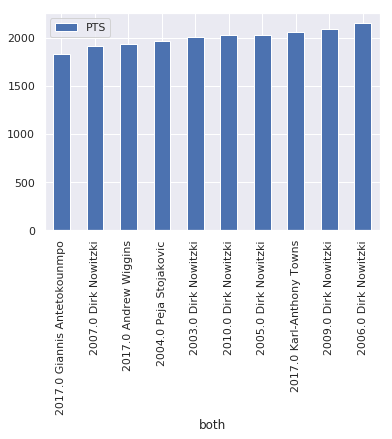

In [78]:
new_df.plot(kind='bar', x='both', y='PTS')

### Total points in NBA by year

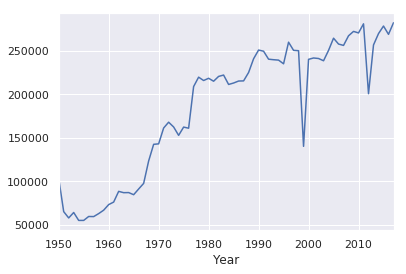

In [79]:
stat.PTS.groupby(stat.Year).sum().plot()

### Total points in NBA by year from international players

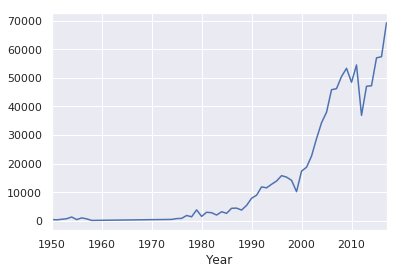

In [80]:
stati.PTS.groupby(stat.Year).sum().plot()

In [81]:
stat.PTS.groupby(stat.Year).sum().shape

(68,)

In [82]:
stati.PTS.groupby(stat.Year).sum().shape

(53,)

In [83]:
stati.PTS.groupby(stat.Year).sum()

Year
1950.0      421.0
1951.0      338.0
1952.0      524.0
1953.0      731.0
1954.0     1315.0
1955.0      425.0
1956.0     1001.0
1957.0      673.0
1958.0      128.0
1974.0      476.0
1975.0      766.0
1976.0      833.0
1977.0     1854.0
1978.0     1398.0
1979.0     3810.0
1980.0     1524.0
1981.0     2982.0
1982.0     2819.0
1983.0     2005.0
1984.0     3161.0
1985.0     2603.0
1986.0     4372.0
1987.0     4428.0
1988.0     3745.0
1989.0     5380.0
1990.0     7874.0
1991.0     8934.0
1992.0    11854.0
1993.0    11518.0
1994.0    12768.0
1995.0    13895.0
1996.0    15784.0
1997.0    15261.0
1998.0    14140.0
1999.0    10182.0
2000.0    17374.0
2001.0    18721.0
2002.0    22645.0
2003.0    28750.0
2004.0    34283.0
2005.0    37945.0
2006.0    45821.0
2007.0    46205.0
2008.0    50444.0
2009.0    53317.0
2010.0    48428.0
2011.0    54485.0
2012.0    36874.0
2013.0    47026.0
2014.0    47222.0
2015.0    56958.0
2016.0    57383.0
2017.0    69247.0
Name: PTS, dtype: float64

### Number of non US players each year

In [84]:
stati.Player.groupby(stati.Year).count()

Year
1950.0      1
1951.0      1
1952.0      1
1953.0      1
1954.0      4
1955.0      1
1956.0      5
1957.0      1
1958.0      1
1974.0      2
1975.0      2
1976.0      2
1977.0      3
1978.0      2
1979.0      7
1980.0      5
1981.0      3
1982.0      5
1983.0      4
1984.0      6
1985.0      7
1986.0     18
1987.0     13
1988.0     11
1989.0     17
1990.0     24
1991.0     24
1992.0     23
1993.0     20
1994.0     35
1995.0     29
1996.0     30
1997.0     37
1998.0     32
1999.0     41
2000.0     46
2001.0     61
2002.0     58
2003.0     67
2004.0     91
2005.0    107
2006.0    114
2007.0    104
2008.0    115
2009.0    117
2010.0    110
2011.0    143
2012.0    110
2013.0    110
2014.0    117
2015.0    133
2016.0    112
2017.0    151
Name: Player, dtype: int64

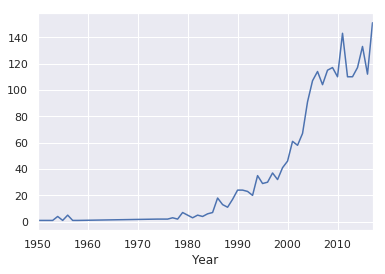

In [85]:
stati.Player.groupby(stati.Year).count().plot()

### Drop stats before 1974

In [86]:
stat_74 = stat.loc[stat.Year >= 1974]

In [87]:
stat_74.PTS.groupby(stat_74.Year).sum().shape

(44,)

In [88]:
stati_74 = stati.loc[stati.Year >= 1974]

In [89]:
stati_74.PTS.groupby(stati_74.Year).sum().shape

(44,)

### Average points per player

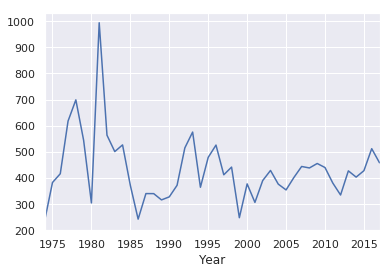

In [90]:
stati_74.PTS.groupby(stati_74.Year).mean().plot()

### PPG

International

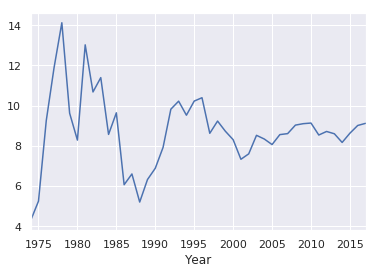

In [91]:
(stati_74.PTS.groupby(stati_74.Year).sum() / stati_74.G.groupby(stati_74.Year).sum()).plot()

USA

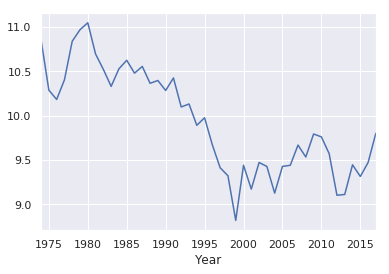

In [92]:
(stat_74.PTS.groupby(stat_74.Year).sum() / stat_74.G.groupby(stat_74.Year).sum()).plot()

Text(0, 0.5, 'Points per Game')

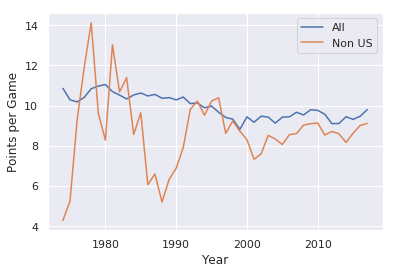

In [93]:
plt.plot(stat_74.PTS.groupby(stat_74.Year).sum() / stat_74.G.groupby(stat_74.Year).sum())
plt.plot(stati_74.PTS.groupby(stati_74.Year).sum() / stati_74.G.groupby(stati_74.Year).sum())
plt.legend(['All', 'Non US'])
plt.xlabel('Year')
plt.ylabel('Points per Game')

### Percentage of total points in NBA

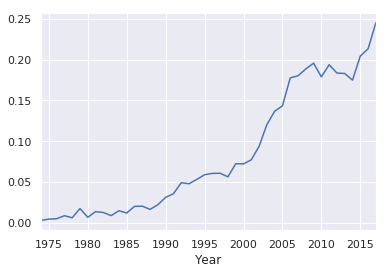

In [94]:
(stati_74.PTS.groupby(stat.Year).sum() / stat_74.PTS.groupby(stat.Year).sum()).plot()

### Percentage of total Players in NBA

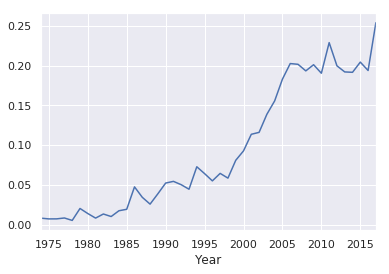

In [95]:
(stati_74.Player.groupby(stat.Year).count() / stat_74.Player.groupby(stat.Year).count()).plot()

### Find traded players

TODO: Describe the problem and solve it

In [99]:
grouped = stati_74.groupby(['Year', 'Player']).count()
traded = grouped[grouped.G > 1]

### Visualisation with Seaborn

Text(-0.19999999999999574, 0.5, 'Percentage')

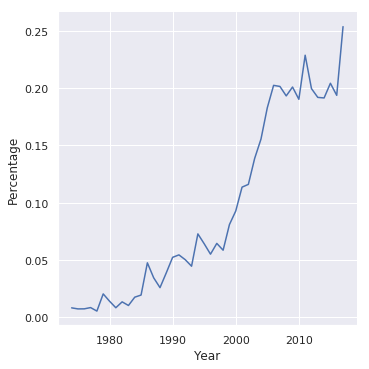

In [100]:
avg = (stati_74.Player.groupby(stat.Year).count() / stat_74.Player.groupby(stat.Year).count())
avg_per_year = sns.relplot(kind='line', data=avg)
plt.xlabel('Year')
plt.ylabel('Percentage')
# avg_per_year.fig.autofmt_xdate()

In [98]:
type(avg.values)

numpy.ndarray